In [2]:
import pandas as pd
import numpy as np
import functions

In [4]:
#Solubility weighted index
weights = {'A': 0.8356956599678218,
 'C': 0.5219207324456876,
 'E': 0.9868660417547442,
 'D': 0.9075983546378998,
 'G': 0.8003827946673535,
 'F': 0.5821934635876957,
 'I': 0.6790449304566072,
 'H': 0.8963977585570367,
 'K': 0.9259165090012061,
 'M': 0.6299964100098959,
 'L': 0.6546922237065839,
 'N': 0.8604957042204235,
 'Q': 0.7895650031998229,
 'P': 0.822104415564934,
 'S': 0.7442464390120463,
 'R': 0.771055152304471,
 'T': 0.8098670971949234,
 'W': 0.6386931894494416,
 'V': 0.7344952876686051,
 'Y': 0.6125581495225544}


#random seq
def random_seq(length=800, rand=123456):
    '''
    Generate random protein sequences of given length.
    '''
    rand_state = np.random.RandomState(rand)
    aa = [k for k, v in weights.items()]
    prot = 'M' + ''.join(rand_state.choice(aa, length-1))
    return prot



rand_df = []
for i in [x for x in range(50, 6050, 50)]:
    r = pd.DataFrame()
    r['Protein'] = [random_seq(length=i, rand=i+_) for _ in range(100)]
    r = r.explode('Protein').copy()
#     r['Protein'] = 'M' + r['Protein']
    rand_df.append(r)
rnd = pd.concat(rand_df)
rnd.reset_index(drop=True, inplace=True)
rnd.to_pickle('results/random_seq.pkl.gz')
rnd.head()

,Protein
0,MTANPCGIFIPFEHRGSDINWLMAIYERMDYYEQADELTSYAANHY...
1,MFAMFTMFSFGDILLICPHTKPFVNDHDEWDPKIPFFWCWDEDMCD...
2,MNPAFLNDDCDCFWTNTSLPRQHGHHHENSLACVFVIRAIWMWMLL...
3,MFTQMFVNDIMPDNISQTLVRTDQAFFAHMQPKKPCNNKSSVTEIC...
4,MRFERCAHWMIMGPTIDVCVNWHHQVHHKYSDFKYKCNPQPYQEEP...


In [41]:
#for random sequences

rnd['Random'] = rnd['Protein'].apply(lambda x:np.mean(functions.solubility_score(x, weights)))

In [42]:
rnd.shape

(12000, 2)

In [5]:
pET = pd.read_pickle('results/pET_complete.pkl.gz')
pET['pET'] = pET['SWI']
pET.head()

pET_soluble = pET.loc[pET['Solubility'] == 1].copy()
pET_soluble = pET_soluble.rename(columns={'pET':'pET (Soluble)'})

pET_insoluble = pET.loc[pET['Solubility'] == 0].copy()
pET_insoluble = pET_insoluble.rename(columns={'pET':'pET (Insoluble)'})

In [5]:
ecoli = pd.read_pickle('results/ecoli.pkl.gz')
ecoli['eSOL'] = ecoli['SWI']

#https://www.pnas.org/content/106/11/4201
ecoli_soluble = ecoli.loc[ecoli['Solubility(%)'] >= 70].copy()
ecoli_soluble = ecoli_soluble.rename(columns={'eSOL':'eSOL (Soluble)'})

ecoli_insoluble = ecoli.loc[ecoli['Solubility(%)'] <= 30].copy()
ecoli_insoluble = ecoli_insoluble.rename(columns={'eSOL':'eSOL (Insoluble)'})


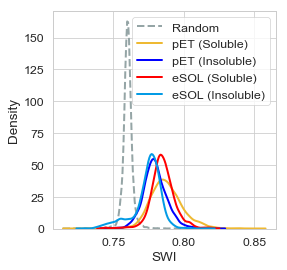

In [37]:
flatui = ["#d32f2f", "#7b1fa2", "#039be5", "#00897b", "#43a047", "#2ECC71",  "#3498db", "#95a5a6",  "#34495e"]


functions.plt.figure(figsize=(4, 4))


functions.sns.kdeplot(rnd['Random'], linestyle='dashed', color=flatui[7], lw=2)
# functions.sns.kdeplot(pET['pET'])
functions.sns.kdeplot(pET_soluble['pET (Soluble)'], color='#EEB932', lw=2)
functions.sns.kdeplot(pET_insoluble['pET (Insoluble)'], color='#0000FF', lw=2)

# ax = functions.sns.kdeplot(ecoli['eSOL'])


functions.sns.kdeplot(ecoli_soluble['eSOL (Soluble)'], color='#FF0000', lw=2)
ax = functions.sns.kdeplot(ecoli_insoluble['eSOL (Insoluble)'], color=flatui[2], lw=2)
ax.set(ylabel='Density', xlabel='SWI')

functions.plt.savefig('figs/random_ecoli_pET_comparision.pdf')

In [ ]:
'''
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

'''